In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.array([[1,2,3],[4,5,6]])
print(a)
a.shape

[[1 2 3]
 [4 5 6]]


(2, 3)

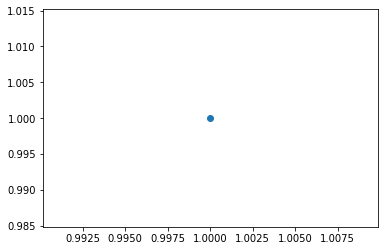

In [3]:
fig = plt.figure()
plt.scatter(1.0, 1.0)
plt.show()

In [4]:
import pygame
import numpy as np

data = np.empty((0, 2), dtype='f')

def createData(position):
    (x, y) = position
    r = np.random.uniform(0,30)
    phi = np.random.uniform(0,2*np.pi)
    coord = [x + r*np.cos(phi), y + r*np.sin(phi)]
    global data
    data = np.append(data, [coord], axis=0)


radius = 2
color = (0, 0, 255)
thickness = 0
    
bg_color = (255, 255, 255)
(width, height) = (640, 480)

screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("TEST")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
    
    if pushing and np.random.uniform(0,1)>.9:
        createData(pygame.mouse.get_pos())
        
    screen.fill(bg_color)
    for point in data:
        pygame.draw.circle(screen, color, (int(point[0]), int(point[1])), radius, thickness)
    pygame.display.flip()
pygame.quit()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


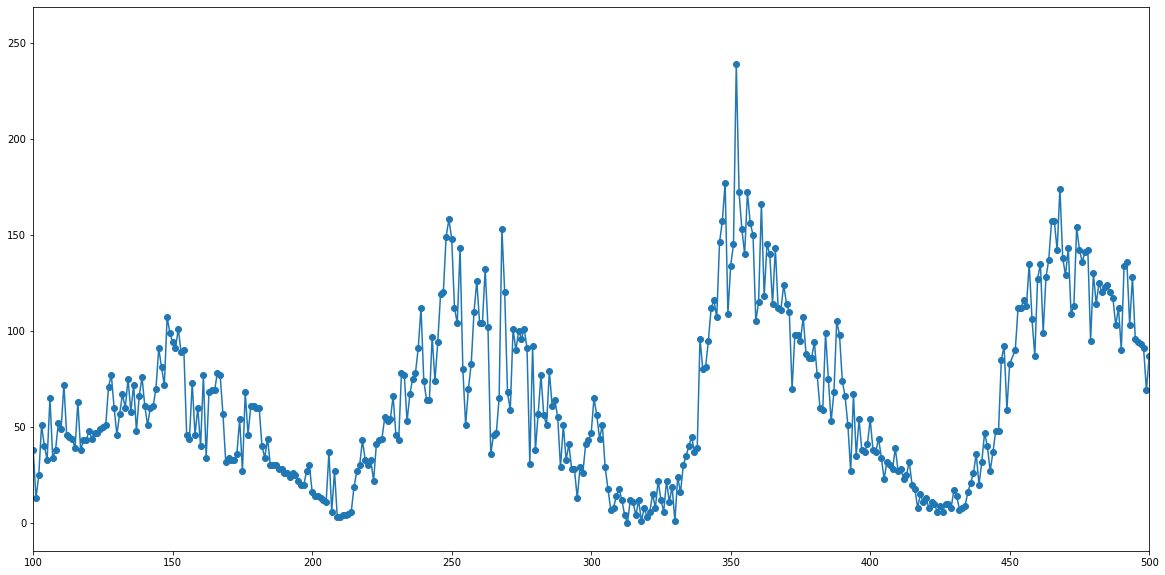

In [5]:
import numpy as np
import matplotlib.pyplot as plt

dataset = np.empty((0,2))

with open("D:\Downloads\sunspot.txt", "r") as file:
    data = file.readlines()
    # print(data)
    for i, line in enumerate(data):
        if i > 3 and i < 3080:
            words = line.split(' ')
            if len(words) != 1:
                dataset = np.append(dataset, [[i-3, float(words[-1][:-1])]], axis=0)
            # print(words)
# print(dataset)
X =dataset[:,0]
Y = dataset[:,1]

plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.xlim(100, 500)
plt.show()

In [6]:
def moving_average(series, window_size):
    result = [series[0]]
    for n in range(1, len(series) - window_size):
        result.append(sum(series[n + i] for i in range(window_size))/float(window_size))
    return result

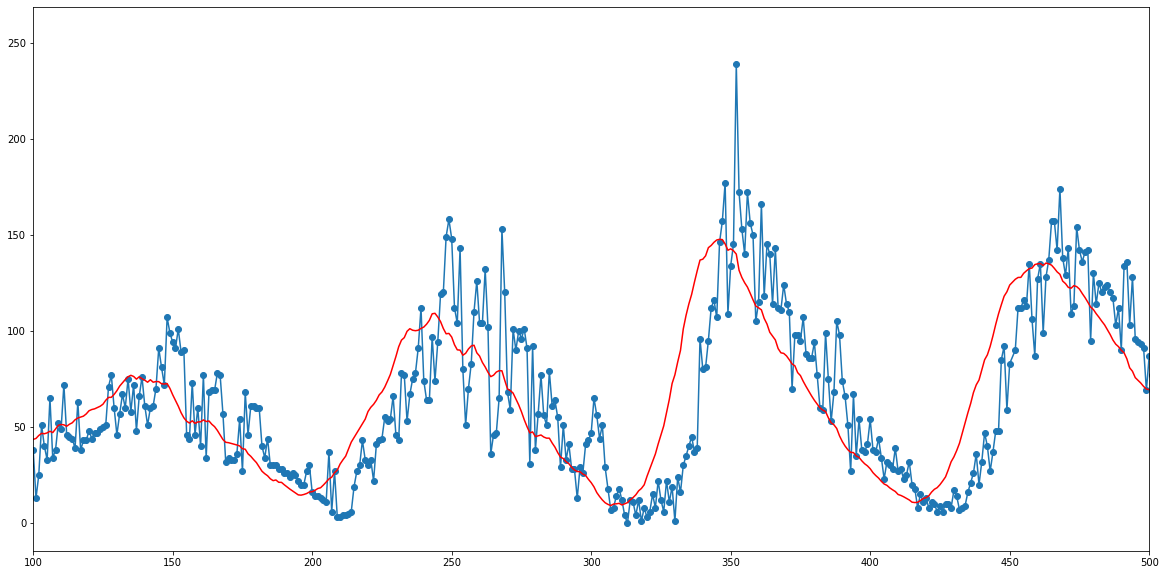

In [7]:
Y_av = moving_average(Y, 20)
plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.plot(X[:len(Y_av)], Y_av, c="r")
plt.xlim(100, 500)
plt.show()

In [8]:
def moving_average(series, window_size):
    result = [series[0]]
    for n in range(1, len(series) - window_size):
        result.append(sum(series[n + i] for i in range(window_size))/float(window_size))
    return result

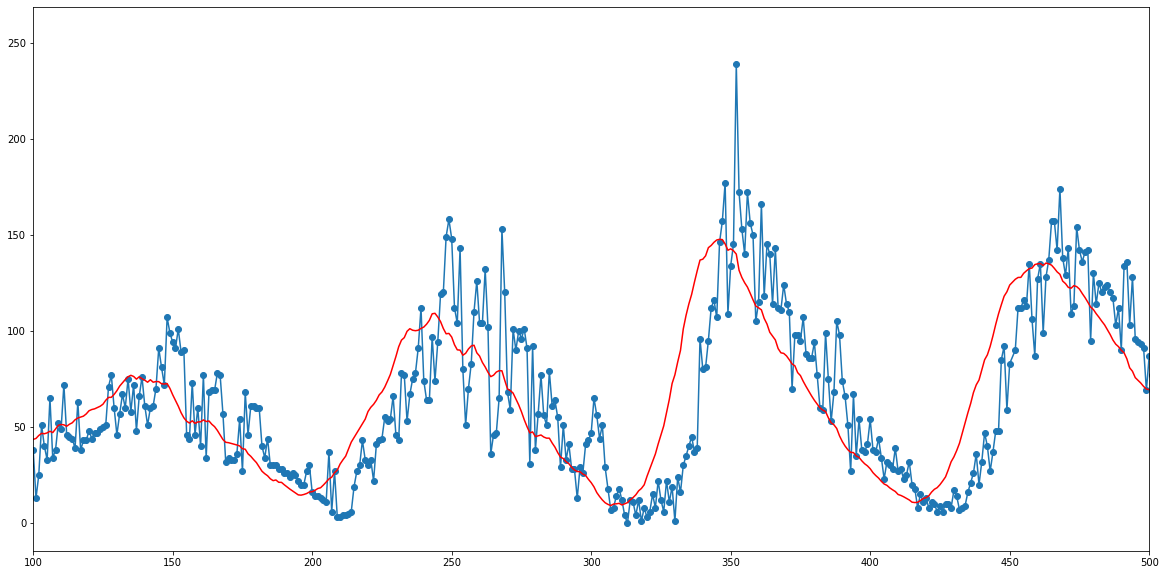

In [9]:
Y_av = moving_average(Y, 20)
plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.plot(X[:len(Y_av)], Y_av, c="r")
plt.xlim(100, 500)
plt.show()

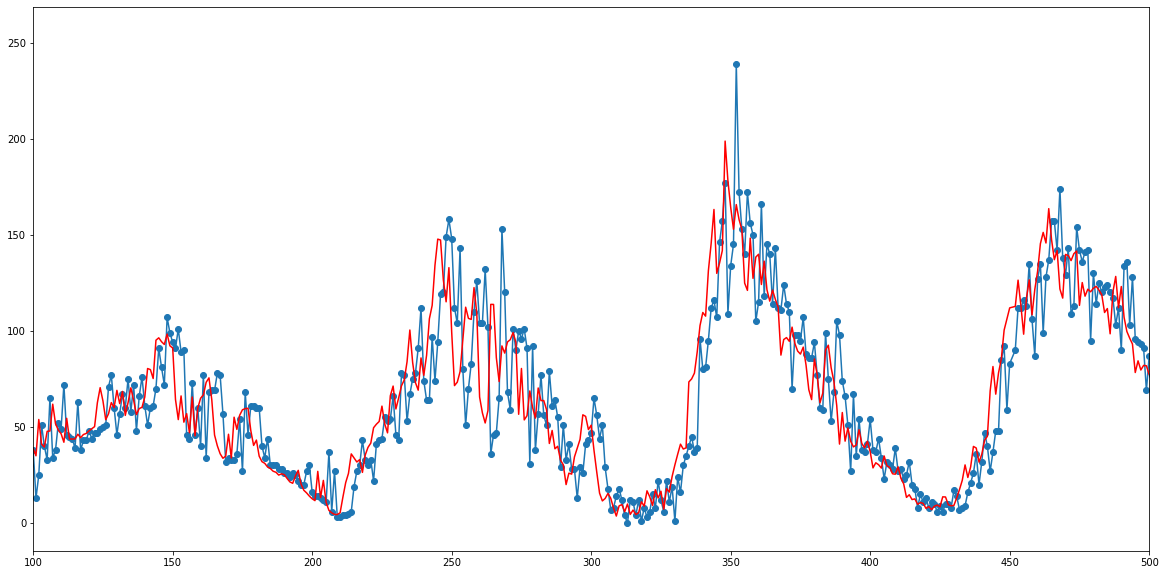

In [10]:
def weighted_average(series, weights):
    results = []
    for n in range(len(weights) - 1, len(series)):
        result = 0.0
        for k in range(len(weights)):
            result += series[n - k] * weights[k]
        results.append(result)
    return results


weights = [.6, .2, .1, .07, .03] # summ of elts = 1
Y_wa = weighted_average(Y, weights)
plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.plot(X[:len(Y_wa)], Y_wa, c="r")
plt.xlim(100, 500)
plt.show()

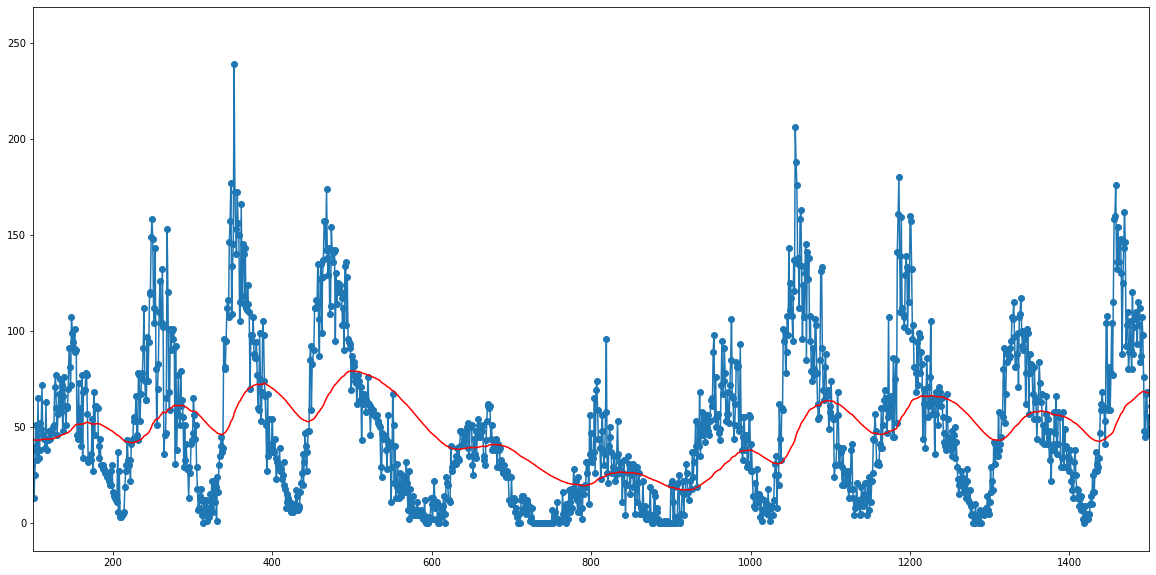

In [11]:
def exponential_smoothing(series, alpha):
    results = [series[0]]
    for n in range(1, len(series)):
        results.append(alpha*series[n]+(1-alpha)*results[n-1])
    return results

Y_es = exponential_smoothing(Y, .01)
plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.scatter(X,Y)
plt.plot(X, Y_es, c="r")
plt.xlim(100, 1500)
plt.show()

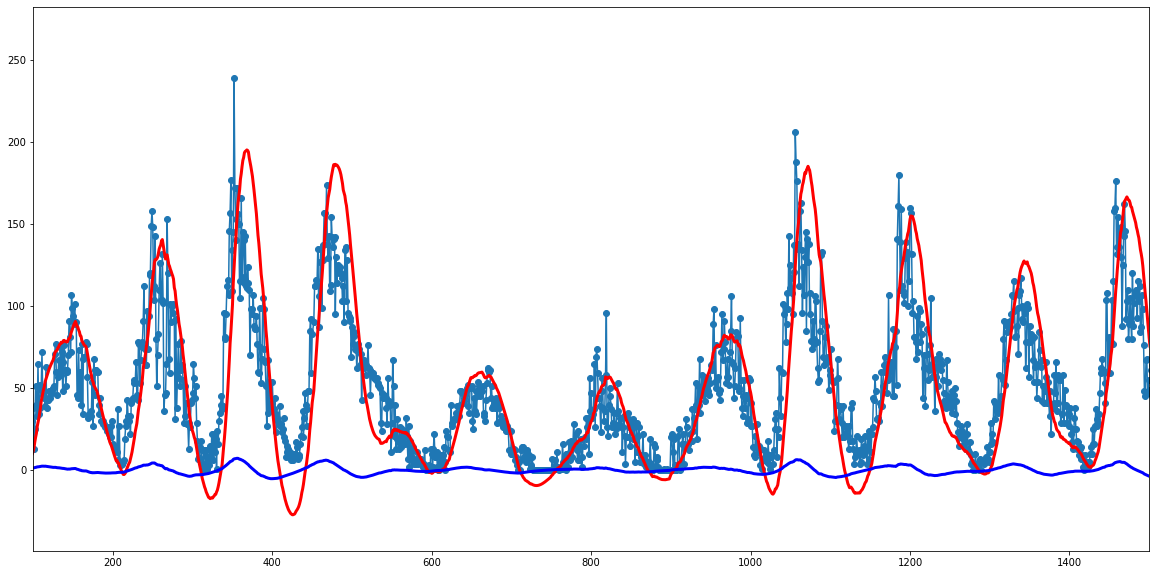

In [12]:
def double_exponential_smoothing(series, alpha, beta):
    results = []
    trends = []
    for n in range(1, len(series) + 1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series):
            value = results[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend    
        results.append(level + trend)
        trends.append(trend)
    return results, trends

Y_es_d = double_exponential_smoothing(Y, .05, .1)
plt.figure(figsize=(20,10))
plt.plot(X,Y)
Y_re, Y_tr = Y_es_d[0], Y_es_d[1]
plt.scatter(X,Y)
plt.plot(X, Y_re, c="r", linewidth=3)
plt.plot(X, Y_tr, c="b", linewidth=3)
plt.xlim(100, 1500)
plt.show()

In [17]:
import urllib.request 
import json
import threading


url = "http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus.json"
req =urllib.request.Request(url)
r = urllib.request.urlopen(req).read()
data = json.loads(r.decode('utf-8'))
print(data[0]['data']['Marsh'])

5


[1 0 1 0 0 1]
[[3.         3.33333333]
 [1.         1.        ]]
[0 0]


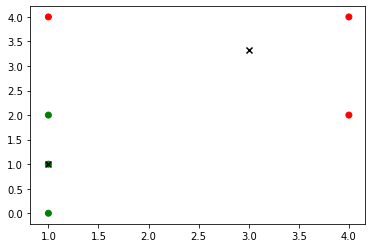

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = np.array([[1,2], [1,4], [1,0], [4,2], [4,4], [1,1]])


kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.predict([[2,6], [7,8]]))

color_list = np.array(['red', 'green', 'blue', '#ff7507', '#03560F'])
color_list[[1,2]]

labels_ = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure()
plt.scatter(X[:,0], X[:,1], c=color_list[kmeans.labels_])
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x')
plt.show()

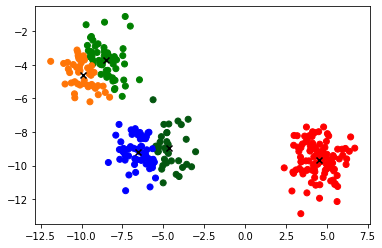

In [19]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, random_state=21)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

color_list = np.array(['red', 'green', 'blue', '#ff7507', '#03560F'])
color_list[[1,2]]

labels_ = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure()
plt.scatter(X[:,0], X[:,1], c=color_list[kmeans.labels_])
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x')
plt.show()

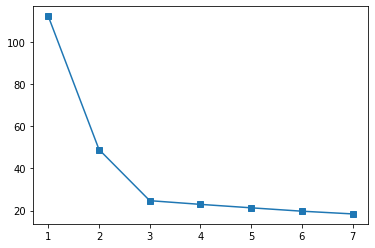

In [20]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1,8), inertia, marker='s')
plt.show()

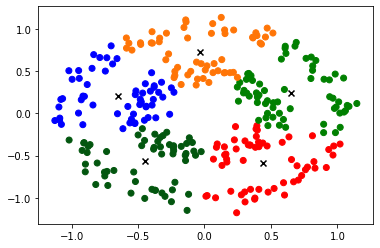

In [21]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=.5, noise=.08)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

color_list = np.array(['red', 'green', 'blue', '#ff7507', '#03560F'])
color_list[[1,2]]

labels_ = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure()
plt.scatter(X[:,0], X[:,1], c=color_list[kmeans.labels_])
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x')
plt.show()

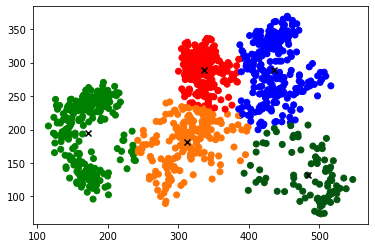

In [22]:
import pygame
import numpy as np

data = np.empty((0, 2), dtype='f')

def createData(position):
    (x, y) = position
    r = np.random.uniform(0,30)
    phi = np.random.uniform(0,2*np.pi)
    coord = [x + r*np.cos(phi), y + r*np.sin(phi)]
    global data
    data = np.append(data, [coord], axis=0)


radius = 2
color = (0, 0, 255)
thickness = 0
    
bg_color = (255, 255, 255)
(width, height) = (640, 480)

screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("TEST")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
    
    if pushing and np.random.uniform(0,1)>.3:
        createData(pygame.mouse.get_pos())
        
    screen.fill(bg_color)
    for point in data:
        pygame.draw.circle(screen, color, (int(point[0]), int(point[1])), radius, thickness)
    pygame.display.flip()
pygame.quit()

kmeans = KMeans(n_clusters=5, random_state=0).fit(data)
labels_ = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure()
plt.scatter(data[:,0], data[:,1], c=color_list[kmeans.labels_])
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x')
plt.show()

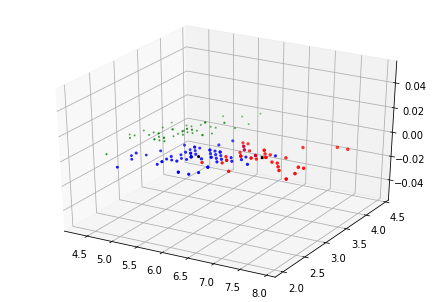

In [23]:
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D


X = load_iris().data
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels_ = kmeans.labels_
centroids = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)

plt.scatter(X[:,0], X[:,1], X[:,2], c=color_list[kmeans.labels_])
plt.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c='black', marker='x')
plt.show()

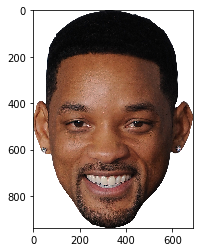

Shape =  (937, 689, 4)


array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [25]:
from matplotlib.image import imread, imsave

def get_img(img_path, show=True):
    origin_img = imread(img_path)
    if show:
        plt.imshow(origin_img)
        plt.show()
        print('Shape = ', origin_img.shape)
    return origin_img

get_img('D:/Desktop/im.png')

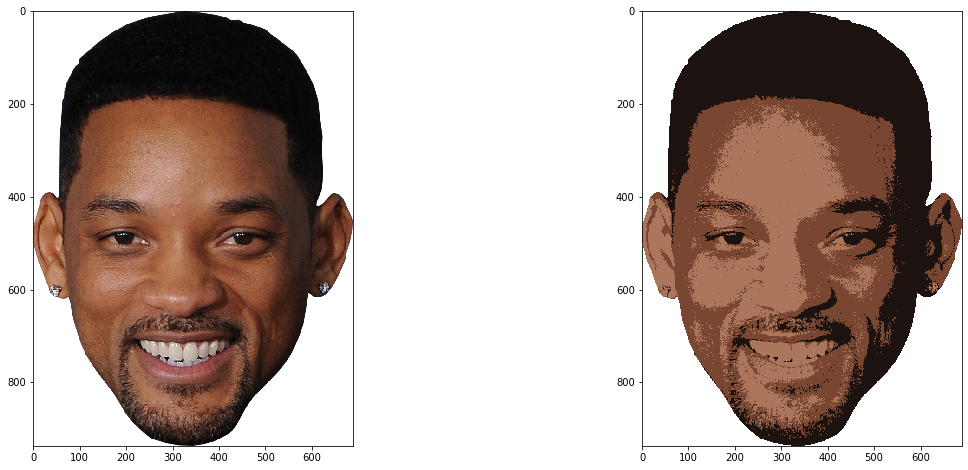

In [26]:
def get_kmeans(orig_img, n_colors):
    X = orig_img.reshape((-1,4))
    kmeans = KMeans(n_clusters=n_colors).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    return centroids[labels].reshape(orig_img.shape)


n_colors = 4
orig_img = get_img('D:/Desktop/im.png', show=False)
new_img = get_kmeans(orig_img, n_colors)
fig, axarr = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(20,8))
axarr[0].imshow(orig_img)
axarr[1].imshow(new_img)
plt.show()

1.0
[0 1 0 0 1 0]


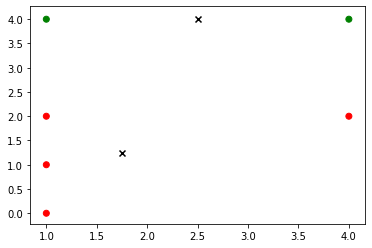

In [8]:
# Lecture 4

import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1,2], [1,4], [1,0], [4,2], [4,4], [1,1]])

class K_Means():
    def __init__(self, dataset, n_clusters = 3):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.max_n_iter = 100
        self.tolerance = .01
        self.fitted = False
        self.labels = np.array([])
        # помещаем центры кластеров на координаты первых k точек
        self.centroids = np.array([self.dataset[k] for k in range(self.n_clusters)], dtype='f')

        
    def get_dist(self, list1, list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1, list2))) # для zip должна быть одинаковая размерность, иначе ошибка
        
    
    def distribute_data(self):
        self.labels = np.array([])
        for elem in self.dataset:
            dist = [self.get_dist(elem, center) for center in self.centroids]
            self.labels = np.append(self.labels, [dist.index(min(dist))]).astype(int)
    
    
    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            for k, label in enumerate(self.labels):
                if label == i:
                    temp += self.dataset[k]
                    num += 1
            self.centroids[i] = temp/num
            
    
    def fit(self):
        iter = 1
        while iter < self.max_n_iter:
            prev_centroids = np.copy(self.centroids)
            self.distribute_data()
            self.recalculate_centroids()
            if max([self.get_dist(i, k) for i,k in zip(self.centroids, prev_centroids)]) < self.tolerance:
                break
            iter += 1
        self.fitted = True
        
        
kmeans = K_Means(X, 2)
print(kmeans.get_dist(X[0], X[5]))
kmeans.distribute_data()
print(kmeans.labels)
kmeans.fit()


color_list = np.array(['red', 'green', 'blue', '#ff7507', '#03560F'])
plt.figure()
plt.scatter(X[:,0], X[:,1], c=color_list[kmeans.labels])
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c='black', marker='x')
plt.show()

(1797, 64)


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

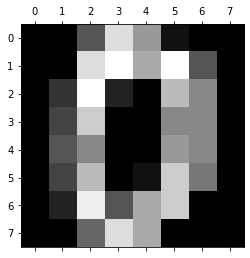

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
Y = digits.target
print(X.shape)

plt.gray()
plt.matshow(digits.images[0])
plt.show

In [ ]:
# выбор случайных координат начальных для центроидов
# из всех х координат и генерируем случайное значение из макс и мин диапазона и так для каждой координаты

# метод predict получает список координат точек, а на выходе последовательность номеров кластеров. Точки могут не хводить в оучающую выбоку. Если fitted =True/
# Учесть различные способы вычисления рассточния между точками. Долджен быть метод выбора способа вычисления расстояния между точками

In [16]:
a = input()
b = input()
print('asdasda\" ', a)
print('asdasd' + b + 'asdasdc')

12
12
33
asdasda"  12
asdasd12asdasdc


In [15]:
# Lecture 5

import numpy as np

X = np.array([[np.random.uniform(0, 20) for i in range(2)] for j in range(8)])
print(X)
num = 3

# берем случайные три точки из списка Х и плюс 1(смещаем все координаты)
centroids = X[np.random.choice(X.shape[0], size=num, replace=False)] + 1
print(centroids)

def get_dist(list1, list2):
    return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))


dist = np.array([[get_dist(i,j) for i in centroids] for j in X])
print(dist)

U = 1 / dist
print(U)

# Транспонировали матрицу
print(U.sum(axis=1)[:,None])

print(U / U.sum(axis=1)[:,None])

[[15.14191707 18.28088085]
 [ 9.52548501  3.57116578]
 [ 0.37746415  5.7743684 ]
 [12.7168347   6.32112317]
 [ 1.02326312  1.66779729]
 [ 2.09447894  0.09531551]
 [ 7.99717949  7.79582807]
 [ 9.20801962 15.11675523]]
[[10.52548501  4.57116578]
 [ 3.09447894  1.09531551]
 [ 1.37746415  6.7743684 ]]
[[14.46608905 20.98772074 17.94045687]
 [ 1.41421356  6.89113007  8.75504146]
 [10.21910093  5.41070286  1.41421356]
 [ 2.8043474  10.94983087 11.34842525]
 [ 9.93588292  2.14887654  5.11884039]
 [ 9.54542293  1.41421356  6.71742941]
 [ 4.0976549   8.30261051  6.69806024]
 [10.6275666  15.29627901 11.44172264]]
[[0.06912718 0.04764691 0.05573994]
 [0.70710678 0.14511408 0.1142199 ]
 [0.09785597 0.18481887 0.70710678]
 [0.3565892  0.09132561 0.08811795]
 [0.10064531 0.46535945 0.19535675]
 [0.10476225 0.70710678 0.14886647]
 [0.24404203 0.12044405 0.14929696]
 [0.09409492 0.06537538 0.08739943]]
[[0.06912718 0.70710678 0.09785597 0.3565892  0.10064531 0.10476225
  0.24404203 0.09409492]
 [0.04

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1,2], [1,4], [1,0], [4,2], [4,4], [1,1]])

class С_Means():
    def __init__(self, dataset, n_clusters = 3):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.max_n_iter = 100
        self.tolerance = .01
        self.fitted = False
        self.labels = np.array([])
        # помещаем центры кластеров на координаты первых k точек
        self.centroids = np.array([self.dataset[k] for k in range(self.n_clusters)], dtype='f')

        
    def get_dist(self, list1, list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1, list2))) # для zip должна быть одинаковая размерность, иначе ошибка
        
    
    def distribute_data(self):
        self.labels = np.array([])
        for elem in self.dataset:
            dist = [self.get_dist(elem, center) for center in self.centroids]
            self.labels = np.append(self.labels, [dist.index(min(dist))]).astype(int)
    
    
    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            for k, label in enumerate(self.labels):
                if label == i:
                    temp += self.dataset[k]
                    num += 1
            self.centroids[i] = temp/num
            
    
    def fit(self):
        iter = 1
        while iter < self.max_n_iter:
            prev_centroids = np.copy(self.centroids)
            self.distribute_data()
            self.recalculate_centroids()
            if max([self.get_dist(i, k) for i,k in zip(self.centroids, prev_centroids)]) < self.tolerance:
                break
            iter += 1
        self.fitted = True
        
        
kmeans = С_Means(X, 2)
print(kmeans.get_dist(X[0], X[5]))
kmeans.distribute_data()
print(kmeans.labels)
kmeans.fit()


color_list = np.array(['red', 'green', 'blue', '#ff7507', '#03560F'])
plt.figure()
plt.scatter(X[:,0], X[:,1], c=color_list[kmeans.labels])
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c='black', marker='x')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN 

In [8]:
import pygame

data = np.empty((0,2), dtype='f')

def createData(position):
    (x, y) = position
    r = np.random.uniform(0,30)
    phi = np.random.uniform(0, 2*np.pi)
    coord = [x + r*np.cos(phi), y + r*np.sin(phi)]
    global data
    data = np.append(data, [coord], axis=0)

radius = 2
color = (0,0,255)
thickness = 0
    
bg_color = (255,255,255)
(width, height) = (640, 480)
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Data Generator")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
    if pushing:
        createData(pygame.mouse.get_pos())
    
    screen.fill(bg_color)
    for point in data:
        pygame.draw.circle(screen, color, (int(point[0]), int(point[1])), radius, thickness)
    pygame.display.flip()
    
pygame.quit()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
labels = DBSCAN(eps=15, min_samples=10).fit_predict(data)

color_list = np.array(['black', 'red', 'green', 'blue', '#ff7f00', '#4daf4a', 'yellow'])

fig = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=color_list[labels])
plt.show

IndexError: index 7 is out of bounds for axis 0 with size 7

<Figure size 432x288 with 0 Axes>

In [ ]:
# Lecture 7 ??? 

In [10]:
import numpy as np

In [11]:
class DB_SCAN():
    def __init__(self, dataset, eps=30.0, min_samples=2):
        self.dataset = dataset
        self.eps = eps
        self.min_samples = min_samples
        self.n_clusters = 0
        self.clusters = {0:[]}
        self.visited = set()
        self.clustered = set()
        self.labels = np.array([])
        self.fitted = False
        
    
    def get_dict(self, list1, list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1, list2)))
    
    # list(q) переводим np.array в обычный список, чтобы дальше можно было выполнить поиск
    def get_neighbours(self, p):
        return [list(q) for q in self.dataset if self.get_dict(p,q) < self.eps]
    
    
    def expand_cluster(self, p):
        if self.n_clusters not in self.clusters:
            self.clusters[self.n_clusters] = []
        self.clustered.add(tuple(p))
        self.clusters[self.n_clusters].append(p)
        neighbours = self.get_neighbours(p)
        while neighbours:
            q = neighbours.pop()
            if tuple(q) not in self.visited:
                self.visited.add(tuple(q))
                q_neighbours = self.get_neighbours(q)
                if len(q_neighbours) > self.min_samples:
                    neighbours.extend(q_neighbours)
            if tuple(q) not in self.clustered:
                self.clustered.add(tuple(q))
                self.clusters[self.n_clusters].append(q)
                if q in self.clusters[0]:
                    self.clusters[0].remove(q)
    
    def fit(self):
        for p in self.dataset:
            p = list(p)
            if tuple(p) in self.visited:
                continue
            self.visited.add(tuple(p))
            neighbours = self.get_neighbours(p)
            if len(neighbours) < self.min_samples:
                self.clusters[0].append(p)
            else:
                self.n_clusters += 1
                self.expand_cluster(p)
                
        self.fitted = True
        
    
    def get_labels(self):
        self.labels = np.array([])
        if not self.fitted:
            self.fit()
        for p in self.dataset:
            for i in range(self.n_clusters + 1):
                if list(p) in self.clusters[i]:
                    self.labels = np.append(self.labels, i).astype(int)
        return self.labels

In [16]:
dbscan = DB_SCAN(data, 30, 2)
dbscan.fit()
labels = dbscan.get_labels()
print(labels)

None


In [2]:
# Lecture 8

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from  import shuffle

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

svc = svm.SVC(kernel='linear', C=1, gamma=.000001).fit(X,y)

# smth else

[[-2  4 -1]
 [ 4  1 -1]
 [ 1  6 -1]
 [ 2  4 -1]
 [ 6  2 -1]]


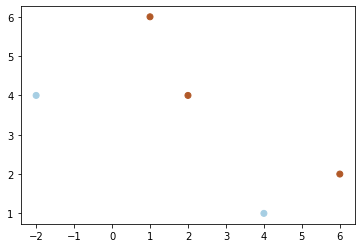

In [5]:
X = np.array([[-2,4], [4,1], [1,6], [2,4], [6,2]])

bias = np.array([[-1 for i in range(X.shape[0])]])
X = np.append(X, bias.T, axis=1)
print(X)

y = np.array([-1, -1, 1, 1, 1])

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.show()

In [6]:
def svm_sgd(X, y):
    w = np.zeros(X.shape[1])
    epochs = 1000 # эпоха = один прогон обучающей выборки. Здесь 1000 прогонов
    
    for epoch in range(1, epochs):
        h = 1/epoch
        X_, y_ = shuffle(X, y)
        for i, x in enumerate(X_):
            dist = 1 - y_[i]*(np.dot(X_[i], w))
            if max(0, dist) == 0:
                w[:-1] -= h * (w[:-1]) / len(X_)
            else:
                w[:-1] -= h * (w[:-1] - X_[i][:-1] * y_[i]) / len(X_)
                w[-1] -= h * y_[i]
    return w

w = svm_sgd(X, y)
print(w)
   
y_test = np.sign(np.dot(X, w))
print(y_test)


plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_test, cmap=plt.cm.Paired)
plt.plot([0, w[-1] / w[0]], [w[-1] / w[1], 0], marker='s')
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
# массив точек с меткаим класса(цвета) сгенерировать дата